<a href="https://colab.research.google.com/github/meenakshii09/learning-github/blob/main/pandas_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
ball=pd.read_csv("IPL_Ball.csv")

In [3]:
matches=pd.read_csv("matcheess.csv")

In [4]:
ipl=pd.merge(ball, matches, on="id")

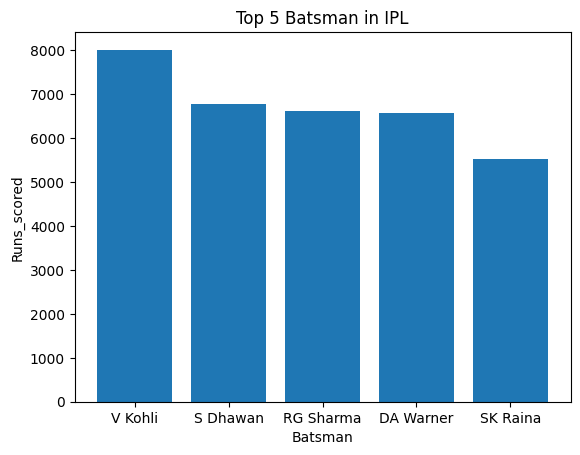

In [5]:
# 1. Display the top 5 batsman in IPL
k=ipl.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5)
k

x=list(k.index)
y=list(k.values)
plt.xlabel("Batsman")
plt.ylabel("Runs_scored")
plt.title("Top 5 Batsman in IPL")
plt.bar(x,y)
plt.show()

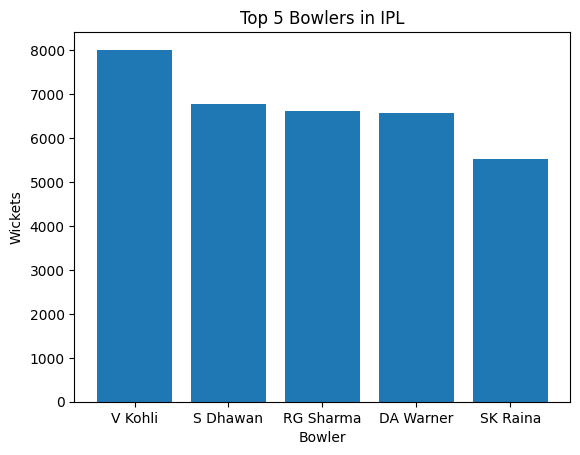

In [6]:
# 2. Display the top 5 bowlers in IPL

wic=ipl[~ipl["dismissal_kind"].isin(['run out', 'retired hurt', 'obstructing the field', 'retired out'])]
wic['dismissal_kind'].unique()
wic.groupby('bowler')['is_wicket'].sum().nlargest(5)

x=list(k.index)
y=list(k.values)
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.title("Top 5 Bowlers in IPL")
plt.bar(x,y)
plt.show()

In [7]:
# 3. Orange cap winner year 2024
ipl['date']=pd.to_datetime(ipl['date'],format='mixed')
ipl['season']=pd.DatetimeIndex(ipl['date']).year #new column 'season' created.
ipl[ipl['season']==2024].groupby('batter')['batsman_runs'].sum().nlargest(1)


,batsman_runs
batter,
V Kohli,741


In [8]:
# 4. Orange cap winner all years

season=ipl['season'].unique()
oc={}
for i in season:
    k=ipl[ipl['season']==i].groupby('batter')['batsman_runs'].sum().nlargest(1)
    oc[i]=[list(k.index),list(k.values)]
oc

{2008: [['SE Marsh'], [616]],
 2009: [['ML Hayden'], [572]],
 2010: [['SR Tendulkar'], [618]],
 2011: [['CH Gayle'], [608]],
 2012: [['CH Gayle'], [733]],
 2013: [['MEK Hussey'], [733]],
 2014: [['RV Uthappa'], [660]],
 2015: [['DA Warner'], [562]],
 2016: [['V Kohli'], [973]],
 2017: [['DA Warner'], [641]],
 2018: [['KS Williamson'], [735]],
 2019: [['DA Warner'], [692]],
 2020: [['KL Rahul'], [676]],
 2021: [['RD Gaikwad'], [635]],
 2022: [['JC Buttler'], [863]],
 2023: [['Shubman Gill'], [890]],
 2024: [['V Kohli'], [741]]}

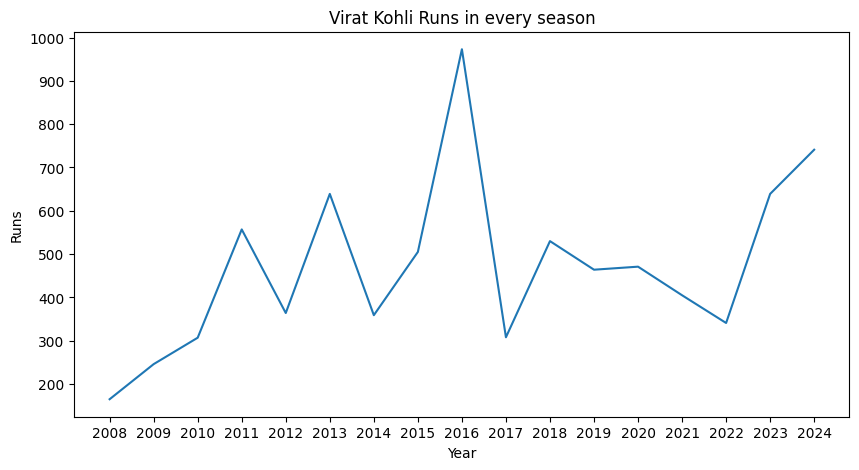

In [9]:
# 5.Virat Kohli runs in every season

vk=ipl[ipl['batter']=='V Kohli']
k=vk.groupby('season')['batsman_runs'].sum()
k
x=list(k.index)
y=list(k.values)
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x)
plt.xlabel('Year')
plt.ylabel('Runs')
plt.title('Virat Kohli Runs in every season')
plt.show()


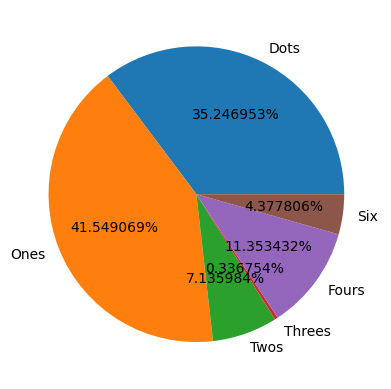

In [15]:
# pie chart V kohli runs

vk = ipl[ipl['batter']=='V Kohli'] ['batsman_runs'].value_counts().sort_index()
if vk.empty:
  print("No data found")
else:
  slices=["Dots", "Ones", "Twos", "Threes","Fours", "Six"]
  val=list(vk.values)
  plt.pie(val,labels=slices,autopct='%2f%%')
  plt.show

In [10]:
# 6. How many runs scored by Virat Kohli (zeros, ones, twos, threes, fours, six)


import pandas as pd

# Filter data for Virat Kohli
kohli_data = ipl[ipl["batter"] == "V Kohli"]

# Count occurrences of each run type
run_counts = kohli_data["batsman_runs"].value_counts().sort_index()

# Print results
print(run_counts.to_dict())


{0: 2198, 1: 2591, 2: 445, 3: 21, 4: 708, 6: 273}


In [11]:
# 7. Season and title winner. (Find last match played of every season and who won that match)

# Convert date column to datetime format for accurate sorting
matches["date"] = pd.to_datetime(matches["date"], dayfirst=True)

# Extract year as season
matches["season"] = matches["date"].dt.year

# Find the last match of each season
last_matches = matches.sort_values(by=["season", "date"]).groupby("season").last()

# Extract season, winner team, and player of the match from last matches
season_winners = last_matches[["winner", "player_of_match"]].reset_index()

# Display results
print(season_winners)


    season                 winner player_of_match
0     2008       Rajasthan Royals       YK Pathan
1     2009        Deccan Chargers        A Kumble
2     2010    Chennai Super Kings        SK Raina
3     2011    Chennai Super Kings         M Vijay
4     2012  Kolkata Knight Riders        MS Bisla
5     2013         Mumbai Indians      KA Pollard
6     2014  Kolkata Knight Riders       MK Pandey
7     2015         Mumbai Indians       RG Sharma
8     2016    Sunrisers Hyderabad     BCJ Cutting
9     2017         Mumbai Indians       KH Pandya
10    2018    Chennai Super Kings       SR Watson
11    2019         Mumbai Indians       JJ Bumrah
12    2020         Mumbai Indians        TA Boult
13    2021    Chennai Super Kings    F du Plessis
14    2022         Gujarat Titans       HH Pandya
15    2023    Chennai Super Kings       DP Conway
16    2024  Kolkata Knight Riders        MA Starc
